# CRQ1

#### Does the 'fare per mile' change among boroughs? aka, which boroughs charge the passengers with more money per mile?
#### We need to consider the traffic congestion too. The price might depend on the trafic taxis find in their way. 

In [115]:
import numpy as np
import pandas as pd
from datetime import datetime
import time

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
df = pd.read_csv(r'C:\Users\samin\Desktop\Homework2\Data\yellow_tripdata_2018-01.csv', usecols =['tpep_pickup_datetime','trip_distance','PULocationID','fare_amount'])

In [61]:
df.head()

,tpep_pickup_datetime,trip_distance,PULocationID,fare_amount
0,2018-01-01 00:21:05,0.5,41,4.5
1,2018-01-01 00:44:55,2.7,239,14.0
2,2018-01-01 00:08:26,0.8,262,6.0
3,2018-01-01 00:20:22,10.2,140,33.5
4,2018-01-01 00:09:18,2.5,246,12.5


In [62]:
df.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759874 entries, 0 to 8759873
Data columns (total 4 columns):
tpep_pickup_datetime    object
trip_distance           float64
PULocationID            int64
fare_amount             float64
dtypes: float64(2), int64(1), object(1)
memory usage: 835.4 MB


In [63]:
#Change data type to reduce memory usage
df['tpep_pickup_datetime']=pd.to_datetime(df['tpep_pickup_datetime'])

df['trip_distance']=df['trip_distance'].astype(np.float16)
df['PULocationID']=df['PULocationID'].astype(np.uint16)
df['fare_amount']=df['fare_amount'].astype(np.float16)

In [64]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759874 entries, 0 to 8759873
Data columns (total 4 columns):
tpep_pickup_datetime    datetime64[ns]
trip_distance           float16
PULocationID            uint16
fare_amount             float16
dtypes: datetime64[ns](1), float16(2), uint16(1)
memory usage: 117.0 MB


In [65]:
#We need to extract Month from out datetime object
df['Month'] = pd.DatetimeIndex(df['tpep_pickup_datetime']).month

In [66]:
df.head()

,tpep_pickup_datetime,trip_distance,PULocationID,fare_amount,Month
0,2018-01-01 00:21:05,0.500000,41,4.5,1
1,2018-01-01 00:44:55,2.699219,239,14.0,1
2,2018-01-01 00:08:26,0.799805,262,6.0,1
3,2018-01-01 00:20:22,10.203125,140,33.5,1
4,2018-01-01 00:09:18,2.500000,246,12.5,1


In [67]:
df.drop(columns=['tpep_pickup_datetime'], inplace=True)

In [68]:
df.info(memory_usage ='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759874 entries, 0 to 8759873
Data columns (total 4 columns):
trip_distance    float16
PULocationID     uint16
fare_amount      float16
Month            int64
dtypes: float16(2), int64(1), uint16(1)
memory usage: 117.0 MB


In [69]:
df.head()

,trip_distance,PULocationID,fare_amount,Month
0,0.500000,41,4.5,1
1,2.699219,239,14.0,1
2,0.799805,262,6.0,1
3,10.203125,140,33.5,1
4,2.500000,246,12.5,1


In [70]:
df.groupby('Month').count()

,trip_distance,PULocationID,fare_amount
Month,,,
1,8759557,8759557,8759557
2,71,71,71
7,6,6,6
12,240,240,240


In [71]:
#delete those rows with month!=1
df.drop(df[(df.Month == 2) | (df.Month == 7) | (df.Month == 12)].index, inplace=True)

In [15]:
df.info(memory_usage ='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8759557 entries, 0 to 8759873
Data columns (total 4 columns):
trip_distance    float16
PULocationID     uint16
fare_amount      float16
Month            int64
dtypes: float16(2), int64(1), uint16(1)
memory usage: 183.8 MB


In [72]:
df['Month']=df['Month'].astype(np.uint8)

In [73]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8759557 entries, 0 to 8759873
Data columns (total 4 columns):
trip_distance    float16
PULocationID     uint16
fare_amount      float16
Month            uint8
dtypes: float16(2), uint16(1), uint8(1)
memory usage: 125.3 MB


In [74]:
df.head()

,trip_distance,PULocationID,fare_amount,Month
0,0.500000,41,4.5,1
1,2.699219,239,14.0,1
2,0.799805,262,6.0,1
3,10.203125,140,33.5,1
4,2.500000,246,12.5,1


In [75]:
df.shape

(8759557, 4)

In [76]:
#clean based on two other columns: 'trip_distance' and  'fare_amount'
#'fare_amount' shouldn't be zero also 'trip_distance'. Negative values also make the dataset dirty so we get rid of them. 

df.drop(df[(df.trip_distance==0)].index, inplace=True)
df.drop(df[(df.fare_amount==0)].index, inplace=True)
df = df[~(df['trip_distance'] < 0)]
df = df[~(df['fare_amount'] < 0)]

In [77]:
df.shape

(8699674, 4)

### Part1: Find the fare amount per mile. For each borough, calculate mean and standard deviation of values. Plot the result and run the t-test on each pair of two boroughs possible

In [78]:
df['price_per_mile'] = df['fare_amount']//df['trip_distance']

In [80]:
df['price_per_mile'].min()

0.0

In [81]:
df.head(10)

,trip_distance,PULocationID,fare_amount,Month,price_per_mile
0,0.500000,41,4.5,1,9.0
1,2.699219,239,14.0,1,5.0
2,0.799805,262,6.0,1,7.0
3,10.203125,140,33.5,1,3.0
4,2.500000,246,12.5,1,5.0
5,0.500000,143,4.5,1,9.0
6,1.700195,50,9.0,1,5.0
7,0.700195,239,4.0,1,5.0
8,1.000000,238,5.5,1,5.0
9,0.700195,170,5.5,1,7.0


In [82]:
df.drop(columns = ['trip_distance', 'fare_amount'], inplace=True)

In [83]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8699674 entries, 0 to 8759871
Data columns (total 3 columns):
PULocationID      uint16
Month             uint8
price_per_mile    float16
dtypes: float16(1), uint16(1), uint8(1)
memory usage: 107.9 MB


In [84]:
df.head()

,PULocationID,Month,price_per_mile
0,41,1,9.0
1,239,1,5.0
2,262,1,7.0
3,140,1,3.0
4,246,1,5.0


In [85]:
#Read 'taxi_zone_lookup' dataset

borough = pd.read_csv(r'C:\Users\samin\Desktop\Homework2\taxi_zone_lookup.csv', usecols = ['LocationID', 'Borough'])

In [86]:
borough.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 2 columns):
LocationID    265 non-null int64
Borough       265 non-null object
dtypes: int64(1), object(1)
memory usage: 18.9 KB


In [87]:
borough.head()

,LocationID,Borough
0,1,EWR
1,2,Queens
2,3,Bronx
3,4,Manhattan
4,5,Staten Island


In [88]:
#Merge df and borough 

result = pd.merge(df,
                 borough,
                 left_on='PULocationID',
                 right_on='LocationID',
                 how='inner' 
                 )


In [89]:
result.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8699674 entries, 0 to 8699673
Data columns (total 5 columns):
PULocationID      uint16
Month             uint8
price_per_mile    float16
LocationID        int64
Borough           object
dtypes: float16(1), int64(1), object(1), uint16(1), uint8(1)
memory usage: 719.9 MB


In [90]:
result.head()

,PULocationID,Month,price_per_mile,LocationID,Borough
0,41,1,9.0,41,Manhattan
1,41,1,6.0,41,Manhattan
2,41,1,13.0,41,Manhattan
3,41,1,2.0,41,Manhattan
4,41,1,3.0,41,Manhattan


In [91]:
del df
del borough

In [92]:
result.drop(columns = ['PULocationID', 'LocationID'], inplace =  True)

In [93]:
result.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8699674 entries, 0 to 8699673
Data columns (total 3 columns):
Month             uint8
price_per_mile    float16
Borough           object
dtypes: float16(1), object(1), uint8(1)
memory usage: 637.0 MB


In [94]:
result.head()

,Month,price_per_mile,Borough
0,1,9.0,Manhattan
1,1,6.0,Manhattan
2,1,13.0,Manhattan
3,1,2.0,Manhattan
4,1,3.0,Manhattan


In [95]:
result['price_per_mile'].min()

0.0

In [96]:
result['price_per_mile'].max()

37500.0

C:\Users\samin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


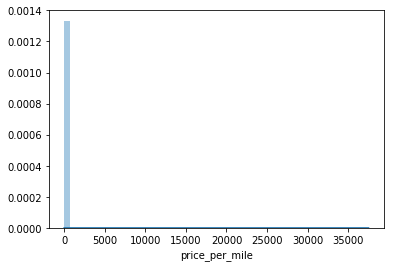

In [97]:
sns.distplot(result['price_per_mile'], kde=False, bins=15, hist_kws=dict(edgecolor="k", linewidth=2))

In [99]:
#result.drop([])
result.drop(result[(result.price_per_mile <1) | (result.price_per_mile>200)].index, inplace=True)

C:\Users\samin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


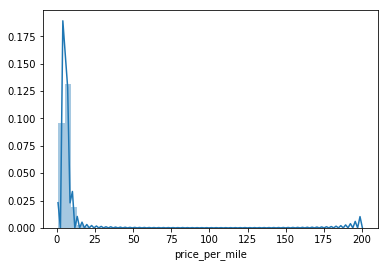

In [101]:
sns.distplot(result['price_per_mile'], kde=Fasle, bins=15, hist_kws=dict(edgecolor="k", linewidth=2))

In [102]:
result['price_per_mile'].min()

1.0

In [103]:
#To have a normalized distribution, we drop prices higher than 25
result.drop(result[(result.price_per_mile >15)].index, inplace=True)

In [ ]:
sns.distplot(result['price_per_mile'], kde=False, bins=15, hist_kws=dict(edgecolor="k", linewidth=2))

In [111]:
sns.__version__

'0.8.1'

In [116]:
print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 2.2.2


In [105]:
result.groupby('Borough').count()

,Month,price_per_mile
Borough,,
Bronx,6428,6428
Brooklyn,97267,97267
EWR,65,65
Manhattan,7861287,7861287
Queens,509162,509162
Staten Island,101,101
Unknown,145302,145302


In [106]:
#delete rows with Borough='unknown' and Borough='EWR'
result.drop(result[(result.Borough == 'EWR') | (result.Borough == 'Unknown')].index, inplace=True)
result.shape

(8474245, 3)

In [107]:
result.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8474245 entries, 0 to 8699673
Data columns (total 3 columns):
Month             uint8
price_per_mile    float16
Borough           object
dtypes: float16(1), object(1), uint8(1)
memory usage: 620.7 MB


In [49]:
M=result.groupby('Borough')['price_per_mile'].mean()

In [50]:
S=result.groupby('Borough')['price_per_mile'].std()

In [51]:
type(M), type(S)

(pandas.core.series.Series, pandas.core.series.Series)

In [52]:
#from scipy import stats
import scipy.stats 
#Welch's t-test
#scipy.stats.ttest_ind(two_data.loc['cat'], two_data.loc['cat2'], equal_var=False)#default is two sided t-test 
#(ttest_ind= independent t- test also called two sapmle t-test or student's t-test)


In [53]:
#ttest_ind(bronx, brooklyn)